In [1]:
from sklearn import datasets

In [2]:
iris=datasets.load_iris()
digits=datasets.load_digits()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
from sklearn import svm
clf=svm.SVC(gamma=0.001,C=100.)

In [7]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
clf.predict(digits.data[-1:])

array([8])

In [352]:
import os
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from num2words import num2words
from collections import Counter
import csv
import tf_idf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [273]:
import json
from tqdm import tqdm
import pandas as pd
dataset1=[]
dataset=[]
#dataset1: the whole dataset
#dataset: minimized version containing 3 books
#0:wikipediaId 1:fiebaseId 2:name 3:author 4:publish date 5:genres 6:summary


In [274]:
with open('D:\\SDP/repo/book_summarization/booksummaries.txt', 'r', encoding="utf8", errors='ignore') as f:
    reader=csv.reader(f,dialect='excel-tab')
    for row in reader:
        dataset.append([row[0],row[2],row[5],row[6]])
        



In [386]:
df=pd.DataFrame(dataset,columns=['ID','Name','Genres','Summary'])


In [387]:
df

,ID,Name,Genres,Summary
0,620,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,The Plague,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,An Enquiry Concerning Human Understanding,,The argument of the Enquiry proceeds by a ser...
4,2080,A Fire Upon the Deep,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...
16554,36934824,Under Wildwood,,"Prue McKeel, having rescued her brother from ..."
16555,37054020,Transfer of Power,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,Decoded,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,America Again: Re-becoming The Greatness We Ne...,,Colbert addresses topics including Wall Stree...


In [388]:
df=df.drop(df[df['Genres']==''].index)

In [389]:
df

,ID,Name,Genres,Summary
0,620,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,The Plague,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,2080,A Fire Upon the Deep,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
5,2152,All Quiet on the Western Front,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...
16549,36372465,The Third Lynx,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,36534061,Remote Control,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...
16555,37054020,Transfer of Power,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,Decoded,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...


In [390]:
list(json.loads('{"/m/016lj8": "Roman \u00e0 clef"}').values())[0]

'Roman à clef'

In [391]:
#Thriller,Fiction,History,Children's literature, Comedy
genretags=['thriller','fiction','history','children\'s literature', 'comedy']
def cleanGenres(y):
    y=list(json.loads(y).values())
    for i in y:
        s=np.char.lower(i)
        if s in genretags:
            return str(s)
        else:
            for g in genretags:
                if str(s).find(g)>0:
                    return str(g)
    return ''

cleanGenres('{"/m/016lj8": "Roman \u00e0 clef","anfjnsajn":"Science Fiction","ashfba":"Thriller"}')

['Roman à clef', 'Science Fiction', 'Thriller']


'fiction'

In [ ]:
df['Genres']=df['Genres'].apply(lambda x: cleanGenres(x))
df=df.drop(df[df['Genres']==''].index)
df

In [393]:
df=df.drop(columns=['ID'])

In [394]:
df['Genres']

0        children's literature
1                      fiction
2                      fiction
4                      fiction
6        children's literature
                 ...          
16546                  fiction
16549                  fiction
16551                 thriller
16555                 thriller
16558                  fiction
Name: Genres, Length: 9969, dtype: object

In [395]:
dfgl=list(df.Genres)

In [396]:
len(dfgl)

9969

In [397]:
dfgl=set(dfgl)

In [398]:
len(dfgl)

5

In [399]:
genres=list(dfgl)
genres

['fiction', "children's literature", 'history', 'thriller', 'comedy']

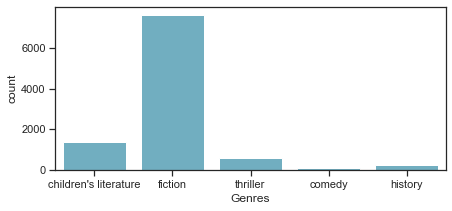

In [401]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="Genres", data=df, color="c");

ERROR occurs HERE!
Works fine for df[:100]
But when I go ahead with df[:500] or more ZeroDivisionError
(It takes around 10-15 mins computing time for 500 records.. So sit tight! ;) )
Current output is loaded for df[:100] , right now df is not minimized, i.e. len(df)=9969.. sorry for the inconsistency

In [348]:

summaryfeatures=[]
summaryfeatures=df['Summary'].apply(lambda x: tf_idf.generate_features(x))


In [349]:
summaryfeatures

0      [uniting, thin, workhorse, special, worlds, wo...
1      [window, young, unintended, walloping, working...
2      [violence, test, well, view, unexpected, ward,...
4      [unthinking, two, years, war, technology, univ...
6      [unawares, willing, turning, world, teaches, v...
                             ...                        
124    [troubled, unhappy, well, youngest, tells, us,...
127    [tormenting, skin, steward, spirit, time, wors...
128    [unable, trip, use, wife, treason, warfare, tr...
129    [wonders, two, tailored, sister, younger, told...
130    [tyrant, transforms, terror, watch, wit, sugge...
Name: Summary, Length: 86, dtype: object

In [271]:
genrefeatures={}
for x in summaryfeatures.keys():
    i=df.loc[x]['Genres']
    try:
        genrefeatures[i]=genrefeatures[i]+summaryfeatures[x]
    except:
        genrefeatures[i]=summaryfeatures[x]
genrefeatures

{'Fiction': ['two',
  'skill',
  'turns',
  'three',
  'spying',
  'undetonated',
  'tell',
  'tribe',
  'story',
  'team'],
 'Science Fiction': ['though',
  'work',
  'theme',
  'tissue',
  'view',
  'wife',
  'world',
  'two',
  'threat',
  'strong',
  'structure',
  'thousand',
  'thought',
  'stripes',
  'well',
  'white',
  'titled',
  'substrate',
  'transform',
  'wars',
  'uses',
  'taking',
  'years',
  'way',
  'train',
  'thought',
  'try',
  'time',
  'voice',
  'uses',
  'using',
  'word',
  'unknown',
  'traitorous',
  'weapon',
  'turmoil',
  'well',
  'within',
  'team',
  'totally',
  'unable',
  'surprise',
  'vigilantes',
  'though',
  'tanks',
  'ways',
  'tricked',
  'would',
  'uncle',
  'work',
  'zinc',
  'worked',
  'three',
  'vacuum',
  'winning',
  'transmission',
  'weapons',
  'upon',
  'thought',
  'time',
  'vessel',
  'urgent',
  'well',
  'tex',
  'unlucky',
  'tests',
  'victims',
  'venerians',
  'trapped',
  'tries',
  'warships',
  'turn',
  'way',

In [175]:
wcloud={}
for i in tqdm(genrefeatures.keys()):
    str1=""
    wcloud[i]=' '.join([str(elem) for elem in genrefeatures[i]])
    

100%|██████████████████████████████████████████████████████| 30/30 [00:00<00:00, 48922.67it/s]


In [176]:
len(wcloud)

30

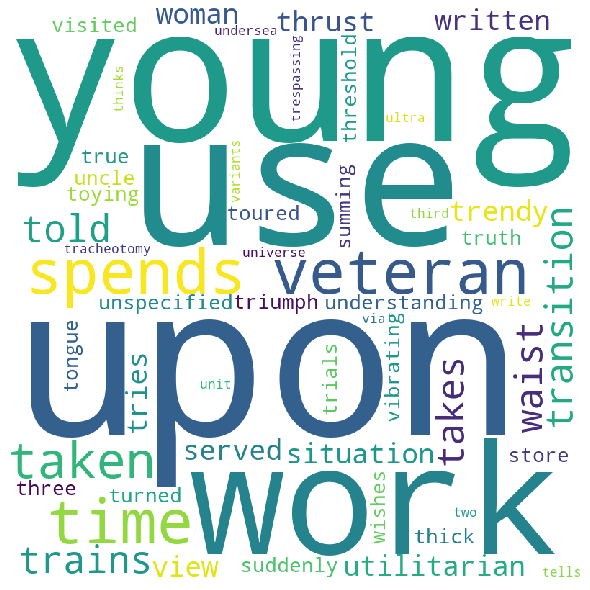

In [272]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

stopwords = set(STOPWORDS) 


wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white',
                stopwords=stopwords,
				min_font_size = 10).generate(wcloud['Fiction']) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [101]:
tags=genres
# tags=df.Genres.apply(lambda x: list(x.keys())[0])

X=df.Summary
Y=list(df.Genres)

In [ ]:
tags

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [104]:
Y_test

['Autobiographical novel',
 'Autobiography',
 'Cyberpunk',
 'Fiction',
 'Novel',
 'Satire',
 'Novel',
 'Chivalric romance',
 'Mystery',
 'Science Fiction',
 'Gothic fiction',
 'Poetry',
 'Fiction',
 'Science Fiction',
 'Alternate history',
 'Thriller',
 'Fiction',
 'Romance novel',
 "Children's literature",
 'War novel',
 'Science Fiction',
 'Science Fiction',
 'Fiction',
 'Speculative fiction',
 'Fiction',
 'Fiction',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Fiction',
 'Novel',
 'Science Fiction',
 'Comic book',
 'Speculative fiction',
 'Non-fiction',
 'Science Fiction',
 'Crime Fiction',
 'Gay novel',
 'Alternate history',
 'Gothic fiction',
 'Fantasy',
 'Horror',
 'Fiction',
 'Fiction',
 'Science Fiction',
 'Speculative fiction',
 'Science Fiction',
 'Science Fiction',
 'Prose poetry',
 'Hard science fiction',
 'Fiction',
 'Speculative fiction',
 'Fantasy',
 'Science Fiction',
 'Science Fiction',
 'Science Fiction',
 'Speculative fiction',
 'Science Fiction',
 '

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [120]:
%%time
from sklearn.metrics import classification_report
Y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.27
                        precision    recall  f1-score   support

       Adventure novel       0.00      0.00      0.00         1
           Albino bias       0.00      0.00      0.00         1
     Alternate history       0.00      0.00      0.00         6
Autobiographical novel       0.00      0.00      0.00         1
         Autobiography       0.00      0.00      0.00         4
          Black comedy       0.00      0.00      0.00         2
 Children's literature       0.00      0.00      0.00        19
     Chivalric romance       0.00      0.00      0.00         1
            Comic book       0.00      0.00      0.00         3
           Comic novel       0.00      0.00      0.00         1
    Conspiracy fiction       0.00      0.00      0.00         1
         Crime Fiction       0.00      0.00      0.00         8
             Cyberpunk       0.00      0.00      0.00         1
                 Drama       0.00      0.00      0.00         2
              Dystopia   

c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_pred

Linear support vector machine

In [124]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [127]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.4066666666666667
                        precision    recall  f1-score   support

       Adventure novel       0.00      0.00      0.00         1
           Albino bias       0.00      0.00      0.00         1
     Alternate history       0.00      0.00      0.00         6
Autobiographical novel       0.00      0.00      0.00         1
         Autobiography       0.00      0.00      0.00         4
          Black comedy       0.00      0.00      0.00         2
 Children's literature       0.25      0.11      0.15        19
     Chivalric romance       0.00      0.00      0.00         1
            Comic book       0.00      0.00      0.00         3
           Comic novel       0.00      0.00      0.00         1
    Conspiracy fiction       0.00      0.00      0.00         1
         Crime Fiction       1.00      0.38      0.55         8
             Cyberpunk       0.00      0.00      0.00         1
                 Drama       0.00      0.00      0.00         2
           

c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred

In [130]:
y_pred = sgd.predict(X[-2:])

print('accuracy %s' % accuracy_score(y_pred, Y[-2:]))
print(classification_report(Y[-2:], y_pred))

accuracy 1.0
                 precision    recall  f1-score   support

    Comic novel       1.00      1.00      1.00         1
Science Fiction       1.00      1.00      1.00         1

       accuracy                           1.00         2
      macro avg       1.00      1.00      1.00         2
   weighted avg       1.00      1.00      1.00         2



In [131]:
y_pred

array(['Science Fiction', 'Comic novel'], dtype='<U23')

In [132]:
Y[-2:]

['Science Fiction', 'Comic novel']

In [133]:
X[-2:]

1207     At the end of The Subtle Knife, Marisa Coulte...
1210     Hugo Carmody, who became secretary to Lord Em...
Name: Summary, dtype: object

In [163]:
sgd.predict(summary)

NameError: name 'summary' is not defined